In [6]:
import tensorflow as tf
print(tf.__version__)

2.0.0


# The Sequential model API

 ## Coding tutorials
 #### [1. Building a Sequential model](#coding_tutorial_1)
 #### [2. Convolutional and pooling layers](#coding_tutorial_2)
 #### [3. The compile method](#coding_tutorial_3)
 #### [4. The fit method](#coding_tutorial_4)
 #### [5. The evaluate and predict methods](#coding_tutorial_5)

***
<a id="coding_tutorial_1"></a>
## Building a Sequential model

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Softmax

#### Build a feedforward neural network model

In [40]:
# Build the Sequential feedforward neural network model
model=Sequential([
    Flatten(input_shape=(28,28),name='input_layer'),
    Dense(16,activation='relu',name='layer_1'),
    Dense(16,activation='relu',name='layer_2'),
    Dense(10,activation='softmax',name='output_layer')
])


In [12]:
# Print the model summary
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Flatten)        (None, 784)               0         
_________________________________________________________________
layer_1 (Dense)              (None, 16)                12560     
_________________________________________________________________
layer_2 (Dense)              (None, 16)                272       
_________________________________________________________________
output_layer (Dense)         (None, 10)                170       
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


***
<a id="coding_tutorial_2"></a>
## Convolutional and pooling layers

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten,Conv2D,MaxPooling2D

#### Build a convolutional neural network model

In [9]:
# Build the Sequential convolutional neural network model
model=Sequential([
    Conv2D(16,kernel_size=3,activation='relu',input_shape=(28,28,1)),
    MaxPooling2D(pool_size=3),
    Flatten(),
    Dense(10,activation='softmax')
])


In [10]:
# Print the model summary

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                10250     
Total params: 10,410
Trainable params: 10,410
Non-trainable params: 0
_________________________________________________________________


***
<a id="coding_tutorial_3"></a>
## The compile method

#### Compile the model

In [11]:
# Define the model optimizer, loss function and metrics
opt=tf.keras.optimizers.Adam(learning_rate=0.05)
acc=tf.keras.metrics.SparseCategoricalAccuracy()
mae=tf.keras.metrics.MeanAbsoluteError()

model.compile(optimizer=opt,#optimizer='sgd'
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy','mae'])#metircs=[acc,mae]

In [23]:
# Print the resulting model attributes
print(model.optimizer)
print(model.loss)
print(model.metrics)
print(model.optimizer.lr)


categorical_crossentropy
[<tensorflow.python.keras.metrics.MeanMetricWrapper object at 0x7fd62b26ce80>, <tensorflow.python.keras.metrics.MeanMetricWrapper object at 0x7fd6280a63c8>]
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.01>


***
<a id="coding_tutorial_4"></a>
## The fit method

In [12]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### Load the data

In [13]:
# Load the Fashion-MNIST dataset

fashion_mnist_data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist_data.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [15]:
# Print the shape of the training data

print(train_images[...,np.newaxis].shape)
print(train_labels.shape)
test_images.shape
print(test_images.shape[0])

(60000, 28, 28, 1)
(60000,)
10000


In [29]:
# Define the labels

labels = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]
print(train_labels[999])

8


In [30]:
# Rescale the image values so that they lie in between 0 and 1.
train_images=train_images/255.
test_images=test_images/255.


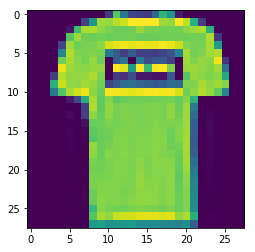

labels: T-shirt/top


In [34]:
# Display one of the images
img=train_images[1,:,:]
plt.imshow(img)
plt.show()
print(f"labels: {labels[train_labels[1]]}")


#### Fit the model

In [48]:
# Fit the model

history=model.fit(train_images[...,np.newaxis],train_labels,epochs=8,batch_size=256)

Train on 60000 samples
Epoch 1/8
60000/60000 [==============================] - 48s 796us/sample - loss: 0.3668 - accuracy: 0.8659 - mae: 4.4200
Epoch 2/8
60000/60000 [==============================] - 47s 780us/sample - loss: 0.3577 - accuracy: 0.8704 - mae: 4.4200
Epoch 3/8
60000/60000 [==============================] - 46s 767us/sample - loss: 0.3509 - accuracy: 0.8724 - mae: 4.4200
Epoch 4/8
60000/60000 [==============================] - 47s 775us/sample - loss: 0.3454 - accuracy: 0.8736 - mae: 4.4200
Epoch 5/8
60000/60000 [==============================] - 47s 777us/sample - loss: 0.3428 - accuracy: 0.8747 - mae: 4.4200
Epoch 6/8
60000/60000 [==============================] - 47s 778us/sample - loss: 0.3374 - accuracy: 0.8755 - mae: 4.4200
Epoch 7/8
60000/60000 [==============================] - 46s 773us/sample - loss: 0.3411 - accuracy: 0.8746 - mae: 4.4200
Epoch 8/8
60000/60000 [==============================] - 45s 753us/sample - loss: 0.3392 - accuracy: 0.8752 - mae: 4.4200


#### Plot training history

In [49]:
# Load the history into a pandas Dataframe
df=pd.DataFrame(history.history)
df.head()


,loss,accuracy,mae
0,0.366789,0.865867,4.420002
1,0.357703,0.870367,4.420001
2,0.350862,0.872450,4.420000
3,0.345358,0.873600,4.420002
4,0.342830,0.874733,4.420002


[Text(0, 0.5, 'Loss'), Text(0.5, 0, 'Epochs')]

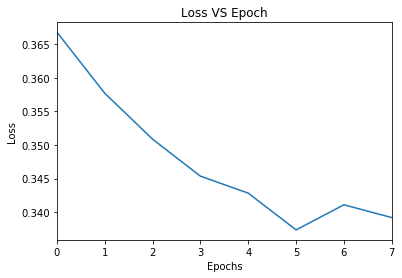

In [50]:
# Make a plot for the loss
loss_plot=df.plot(y="loss",title="Loss VS Epoch",legend=False)
loss_plot.set(xlabel='Epochs',ylabel='Loss')



[Text(0, 0.5, 'Accuracy'), Text(0.5, 0, 'Epochs')]

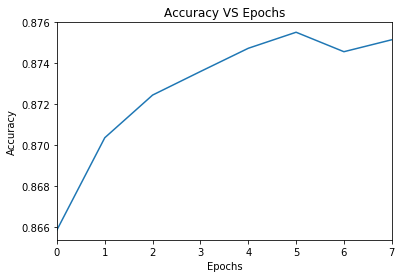

In [51]:
# Make a plot for the accuracy
acc_plot=df.plot(y="accuracy",title='Accuracy VS Epochs',legend=False)
acc_plot.set(xlabel='Epochs',ylabel='Accuracy')


[Text(0, 0.5, 'Mae'), Text(0.5, 0, 'Epochs')]

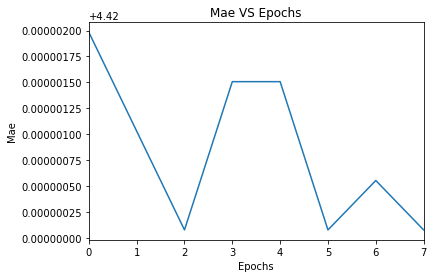

In [53]:
# Make a plot for the additional metric
mae_plot=df.plot(y='mae',title='Mae VS Epochs',legend=False)
mae_plot.set(xlabel='Epochs',ylabel='Mae')


***
<a id="coding_tutorial_5"></a>
## The evaluate and predict methods

In [54]:
import matplotlib.pyplot as plt
import numpy as np

#### Evaluate the model on the test set

In [65]:
# Evaluate the model
test_loss,test_acc,test_mae=model.evaluate(test_images[...,np.newaxis],test_labels,verbose=2)


8352/1 - 4s


KeyboardInterrupt: 

#### Make predictions from the model

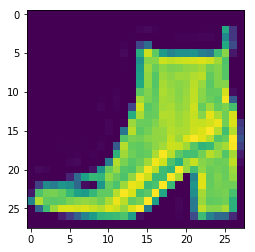

Label: Ankle boot


In [60]:
# Choose a random test image

random_inx = np.random.choice(test_images.shape[0])

test_image = test_images[random_inx]
plt.imshow(test_image)
plt.show()
print(f"Label: {labels[test_labels[random_inx]]}")

In [63]:
# Get the model predictions
prediction=model.predict(test_image[np.newaxis,...,np.newaxis])
print(f"label:{labels[np.argmax(prediction)]}")

label:Ankle boot
